# Amostra de cães para análise
Esta análise não possui dados conclusivos, vendo que utiliza apenas um conjunto de dados pequeno, para aula de estatística.

In [147]:
# Imports e conjunto de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, ceil
%matplotlib inline

df_dog = pd.read_excel('variaveis.xlsx')

In [148]:
# Verificação do conjunto de dados
df_dog.head()

,Sexo,Raça,peso em Kg,idade,qtd vacinas,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,M,pinscher,7.5,12.0,1,F,24.0,NaN,17 RAÇÃS
2,M,rottweiller,12.0,7.0,0,M,26.0,NaN,NaN
3,F,pastor alemão,3.0,10.0,0,NaN,NaN,pinscher,3
4,F,pug,2.0,1.0,3,NaN,NaN,rottweiller,4
5,F,maltês,1.5,0.6,1,NaN,NaN,pastor alemão,3


### Limpeza do conjunto de dados

In [149]:
df_dog.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [150]:
df_dog.head()

,Sexo,Raça,peso em Kg,idade,qtd vacinas
1,M,pinscher,7.5,12.0,1
2,M,rottweiller,12.0,7.0,0
3,F,pastor alemão,3.0,10.0,0
4,F,pug,2.0,1.0,3
5,F,maltês,1.5,0.6,1


In [151]:
# Corerção das colunas
df_dog.rename(columns= lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [152]:
df_dog.head()

,sexo,raça,peso_em_kg,idade,qtd_vacinas
1,M,pinscher,7.5,12.0,1
2,M,rottweiller,12.0,7.0,0
3,F,pastor alemão,3.0,10.0,0
4,F,pug,2.0,1.0,3
5,F,maltês,1.5,0.6,1


In [153]:
# Verificando valores vazios
df_dog.isnull().sum()

sexo           0
raça           0
peso_em_kg     0
idade          0
qtd_vacinas    0
dtype: int64

# Questões importantes para análise da amostra
- Qual o sexo mais aparente na amostra?
- Qual raça tem maior parcela na amostra?
- Quais raças estão acima da idade mediana?
- Qual porte mais aparente na amostra?
- Quantos porcento da amostra de cães não está devidamente vacinados?

In [154]:
# Valores de machos e femeas do conjunto
sexo = df_dog['sexo'].value_counts()
sexo

M    26
F    24
Name: sexo, dtype: int64

In [155]:
size_sexo = df_dog['sexo'].count()

In [156]:
labels = ['Macho', 'Femea']
sizes = [(sexo[0]/size_sexo)*100, (sexo[1]/size_sexo)*100]
colors = ['Blue', 'Red']

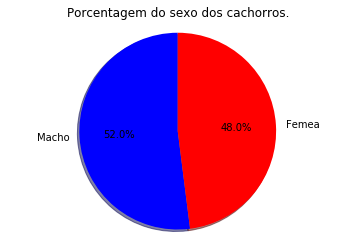

In [157]:
# Passando os paramêtros para geração do gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Porcentagem do sexo dos cachorros.')
plt.show();

São mais aparentes cães machos na amostra

In [158]:
# Quantia por raça
racas = df_dog['raça'].value_counts()
# Valor total de registros em raças
raca_size = df_dog['raça'].count()
# Exibindo quantia por raça
racas

pug              9
boxer            6
rottweiller      4
poodlle          4
pastor alemão    3
fox p            3
pinscher         3
bulldog          3
pequines         3
beagle           2
maltês           2
chihuauhua       2
yourkshire       2
cão pelado       1
salsicha         1
shihtsu          1
cocker           1
Name: raça, dtype: int64

In [159]:
# Criando as labels para o gráfico
labels = [raca.title() for raca in racas.index]
# Determinando a porcentagem de cada um deles
sizes = [(value/raca_size)*100 for value in racas.values]

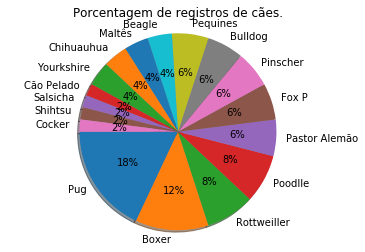

In [160]:
# Gerando o gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=180)
ax1.axis('equal')
plt.title('Porcentagem de registros de cães.')
plt.show();

A raça com maior parcela na amostra é o Pug, sendo 18% da amostra.

In [161]:
# Recebendo mediana
mediana = df_dog['idade'].median()

In [162]:
# Selecionando apenas as raças com idade acima da mediana
acima = df_dog.query('idade >= @mediana')

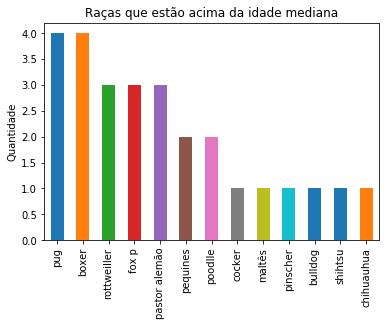

In [163]:
# Gerando gráfico
acima['raça'].value_counts().plot(kind='bar', title='Raças que estão acima da idade mediana')
plt.ylabel('Quantidade');

Estas são as raças e a quantidade de vezes em que aparecem acima da idade mediana.

In [164]:
intevalos = [0, 6, 15, 25, 45, 60]
rotulos = ['Mini', 'Pequeno', 'Médio', 'Grande', 'Gigante']

In [165]:
# Criando uma nova coluna e inserido os rótulos de acordo com os intervalos
df_dog['porte'] = pd.cut(df_dog['peso_em_kg'], intevalos, labels=rotulos)

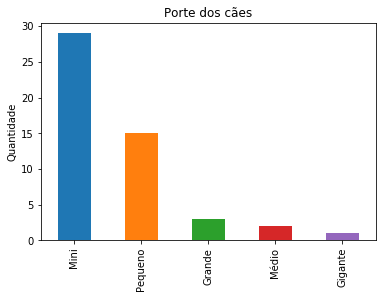

In [166]:
# Geração de um gráfico de barras com a quantidade por porte dos cães
df_dog['porte'].value_counts().plot(kind='bar',title='Porte dos cães');
plt.ylabel('Quantidade');

Na maioria dos registros temos cães de porte Mini.

In [167]:
total = df_dog['qtd_vacinas'].count()
sem_vacina = df_dog['qtd_vacinas'].value_counts()[0]
resto = total - sem_vacina

In [168]:
labels = ['Não Vacinados', 'Vacinados']
sizes = [(sem_vacina/total)*100, (resto/total)*100]
explode = (0.1, 0)

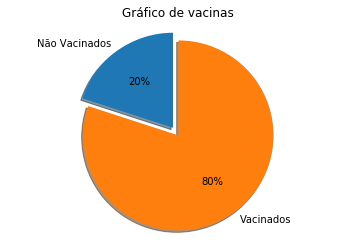

In [169]:
# Gerando o gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Gráfico de vacinas')
plt.show();

20% dos cães não são devidamente vacidos.

## Distribuição de frequência
### Tipos de frequência
- Frequência absoluta $(f_i)$: número total de elementos em cada classe
- Frequência relativa $(fr_i)$: razão entre cada valor da frequência absoluta e o total de observações 
$$
fr_i = \frac {f_i}{\sum f_i}
$$
- Frequência acumulada $(F_i)$: soma das frequências simples de uma classe com a frequência simples da classe anterior
- Frequência acumulada relativa $(Fr_i)$: frequência acumulada da classe dividida pelo total de observações
$$
Fr_i = \frac {F_i}{\sum f_i}
$$
### Critério de Sturges
- Número de classes (linhas)

$
K = 1+3,33\log^n
$
- Amplitude das classes

$
h = \frac {Xmax-Xmin}{K}
$

In [170]:
# Descobrindo o número de classes (linhas)
size_weight = df_dog['peso_em_kg'].shape[0]
linhas = ceil(1+3.33*log10(size_weight))

In [171]:
# Descobrindo a amplitude
amplitude = ceil((np.max(df_dog['peso_em_kg']) - np.min(df_dog['peso_em_kg'])) / linhas)

In [172]:
pesos = ['{},5 → {},5'.format(peso, peso+amplitude) for peso in range(1, 58, amplitude)]

In [173]:
# Inserindo os intervalos no dataframe
df_frequencia_pesos = pd.DataFrame()
df_frequencia_pesos['xi'] = pesos

In [174]:
# Calculando a frequencia e inserindo no dataframe
frequencias = []
for valor in range(1, 58, amplitude):    
    frequencia = sum((df_dog['peso_em_kg'] >= valor+0.5) & (df_dog['peso_em_kg'] < valor+amplitude+0.5))
    frequencias.append(frequencia)
df_frequencia_pesos['fi'] = frequencias

In [175]:
# Calculando as frequencias em porcentagem e inserindo no dataframe
df_frequencia_pesos['fri'] = [(fri/size_weight)*100 for fri in frequencias]

In [176]:
# Calculando a frequencia relativa e inserindo no dataframe
soma = 0
FI = []
for fi in frequencias:
    soma=soma+fi
    FI.append(soma)
df_frequencia_pesos['Fi'] = FI

In [177]:
# Calculando a frequencia relativa em porcentagem
df_frequencia_pesos['Fri'] = [(fri/size_weight)*100 for fri in FI]

### Distribuição de frequência dos pesos dos cães

In [178]:
df_frequencia_pesos

,xi,fi,fri,Fi,Fri
0,"1,5 → 10,5",41,82.0,41,82.0
1,"10,5 → 19,5",4,8.0,45,90.0
2,"19,5 → 28,5",2,4.0,47,94.0
3,"28,5 → 37,5",2,4.0,49,98.0
4,"37,5 → 46,5",0,0.0,49,98.0
5,"46,5 → 55,5",0,0.0,49,98.0
6,"55,5 → 64,5",1,2.0,50,100.0


#### Análise
- 4 cães ou seja 8%, apresentam peso maior de 10,5kg e menor que 19,5kg
- 45 cães ou seja 90%, apresentam peso maior de 1,5kg e menor que 19,5kg

In [179]:
# Descobrindo a amplitude
amplitude = ceil((np.max(df_dog['idade']) - np.min(df_dog['idade'])) / linhas)

In [180]:
idades = ['{},6 → {},6'.format(idade, idade+amplitude) for idade in range(0, 14, amplitude)]

In [181]:
df_frequencia_idades = pd.DataFrame()
df_frequencia_idades['xi'] = idades

In [182]:
# Calculando a frequencia e inserindo no dataframe
frequencias = []
for valor in range(0, 14, amplitude):    
    frequencia = sum((df_dog['idade'] >= valor+0.6) & (df_dog['idade'] < valor+amplitude+0.6))
    frequencias.append(frequencia)
df_frequencia_idades['fi'] = frequencias

In [183]:
# Calculando as frequencias em porcentagem e inserindo no dataframe
df_frequencia_idades['fri'] = [(fri/size_weight)*100 for fri in frequencias]

In [184]:
# Calculando a frequencia relativa e inserindo no dataframe
soma = 0
FI = []
for fi in frequencias:
    soma=soma+fi
    FI.append(soma)
df_frequencia_idades['Fi'] = FI

In [185]:
# Calculando a frequencia relativa em porcentagem
df_frequencia_idades['Fri'] = [(fri/size_weight)*100 for fri in FI]

### Distribuição de frequência das idades dos cães

In [186]:
df_frequencia_idades

,xi,fi,fri,Fi,Fri
0,"0,6 → 2,6",15,30.0,15,30.0
1,"2,6 → 4,6",12,24.0,27,54.0
2,"4,6 → 6,6",5,10.0,32,64.0
3,"6,6 → 8,6",7,14.0,39,78.0
4,"8,6 → 10,6",7,14.0,46,92.0
5,"10,6 → 12,6",4,8.0,50,100.0
6,"12,6 → 14,6",0,0.0,50,100.0


#### Análise
- 12 cães ou seja 24%, tem sua idade maior de dois anos e seis meses e menor de 4 anos e seis meses
- 27 cães ou seja 54%, tem sua idade maior de seis meses e menor de 4 anos e seis meses

## Medidas estatísticas
### Medidas de tendência central
- Média aritimética $(M_e)$

$
M_e = \frac{\sum x_i}{n}
$
- Mediana - $(M_d)$
Caso o número de elementos no conjunto seja impar, a mediana é o elemento central, 
caso seja par a mediana é a média dos dois elementos centrais

$
M_d = \frac{x_i + x_{i+1}}{2}
$
- Moda - $(M_o)$
Representa o valor mais frequente de um conjunto de dados, sendo assim, para defini-la basta observar a frequência com que os valores aparecem.
Um conjunto de dados é chamado de bimodal quando apresenta duas modas, ou seja, dois valores são mais frequentes.

### Medidas para peso em kilo

In [194]:
media = df_dog['peso_em_kg'].mean()
mediana = df_dog['peso_em_kg'].median()
moda = df_dog['peso_em_kg'].mode()
print('Média = {}\nMediana = {}\nModa = {}'.format(media, mediana, moda))

Média = 8.844
Mediana = 6.0
Moda = 0    6.0
dtype: float64


### Medidas para idade

In [195]:
media = df_dog['idade'].mean()
mediana = df_dog['idade'].median()
moda = df_dog['idade'].mode()
print('Média = {}\nMediana = {}\nModa = {}'.format(media, mediana, moda))

Média = 5.106
Mediana = 4.0
Moda = 0    2.0
1    3.0
dtype: float64
